# To build a CNN-based model for detecting melanoma and other skin diseases using the provided dataset.

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.



The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:

Actinic keratosis
Basal cell carcinoma
Dermatofibroma
Melanoma
Nevus
Pigmented benign keratosis
Seborrheic keratosis
Squamous cell carcinoma
Vascular lesion

Project Pipeline
Data Reading/Data Understanding → Defining the path for train and test images
Dataset Creation→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
Dataset visualisation → Create a code to visualize one instance of all the nine classes present in the dataset
Model Building & training :
Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
Choose an appropriate optimiser and loss function for model training
Train the model for ~20 epochs
Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.
Chose an appropriate data augmentation strategy to resolve underfitting/overfitting
Model Building & training on the augmented data :
Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
Choose an appropriate optimiser and loss function for model training
Train the model for ~20 epochs
Write your findings after the model fit, see if the earlier issue is resolved or not?
Class distribution: Examine the current class distribution in the training dataset
- Which class has the least number of samples?
- Which classes dominate the data in terms of the proportionate number of samples?
Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.
Model Building & training on the rectified class imbalance data :
Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
Choose an appropriate optimiser and loss function for model training
Train the model for ~30 epochs
Write your findings after the model fit, see if the issues are resolved or not?

# 1. Data Reading and Understanding
First, we need to ensure that the dataset is correctly set up and that we have a clear understanding of its structure.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Specify the path to the dataset
directory_path = '/content/drive/MyDrive/CnnUpgrade'
data_directory = os.path.join(directory_path, 'Skin cancer ISIC The International Skin Imaging Collaboration/Train')

# List files in the directory
files = os.listdir(data_directory)
print(files)

Mounted at /content/drive
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# 2. Dataset Creation
We will create training and validation datasets using ImageDataGenerator while resizing images to 180x180 pixels.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMG_SIZE = 180
BATCH_SIZE = 32
EPOCHS = 20

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1793 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


# 3. Dataset Visualization
Visualizing the dataset can help understand the distribution of classes and sample images.

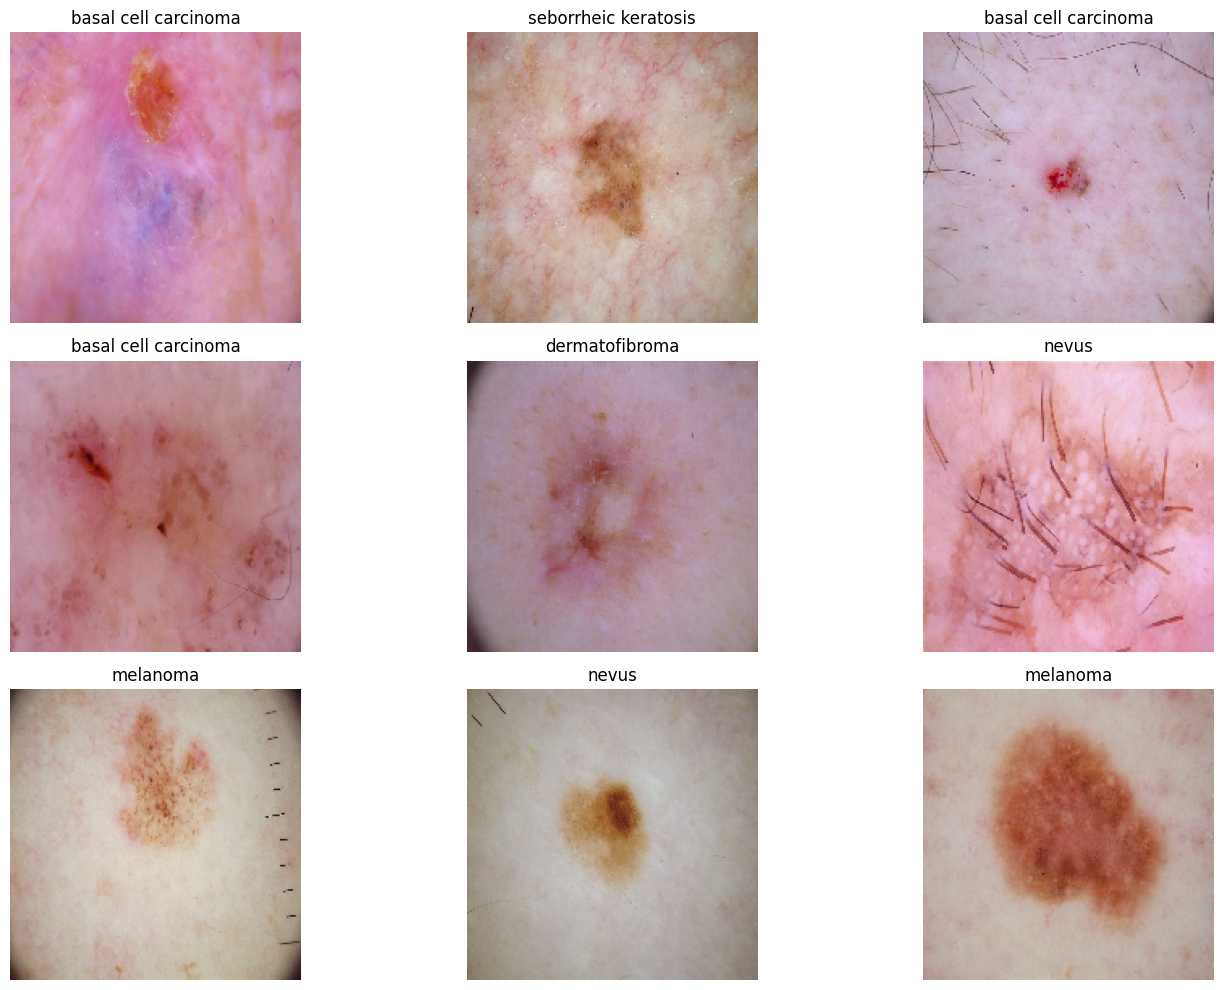

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_classes(generator):
    classes = list(generator.class_indices.keys())
    plt.figure(figsize=(15, 10))

    # Display one image from each class
    for i in range(len(classes)):
        img, label = next(generator)  # Get a batch of images and labels
        plt.subplot(3, 3, i + 1)       # Create a subplot for each class
        plt.imshow(img[0])              # Display the first image from the batch
        plt.title(classes[np.argmax(label[0])])  # Set the title to the class name
        plt.axis('off')                 # Turn off axis labels

    plt.tight_layout()                 # Adjust layout for better spacing
    plt.show()

# Visualize one instance of all classes
visualize_classes(train_generator)

# 4. Model Building and Training
We will create a CNN model, train it, and evaluate its performance.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(train_generator.class_indices), activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
history = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 552s 8s/step - accuracy: 0.1943 - loss: 2.3714 - val_accuracy: 0.3423 - val_loss: 1.8133
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 441ms/step - accuracy: 0.3370 - loss: 1.8952 - val_accuracy: 0.3986 - val_loss: 1.7708
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 433ms/step - accuracy: 0.3303 - loss: 1.8561 - val_accuracy: 0.3559 - val_loss: 1.7963
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 437ms/step - accuracy: 0.4491 - loss: 1.6083 - val_accuracy: 0.2162 - val_loss: 2.4584
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 439ms/step - accuracy: 0.3708 - loss: 1.8966 - val_accuracy: 0.3626 - val_loss: 1.7632
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 442ms/step - accuracy: 0.3991 - loss: 1.7324 - val_accuracy: 0.3964 - val_loss: 1.7247
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 439ms/step - accuracy: 0.4672 - loss: 1.5659 - val_accuracy: 0.3514 - val_loss: 1.7862
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 436ms/step - accuracy: 0.4754 - loss: 1.5330 - val_accuracy: 0.4212 

# 5. Analyzing Model Performance
After training, we will analyze the model's performance to check for overfitting or underfitting.

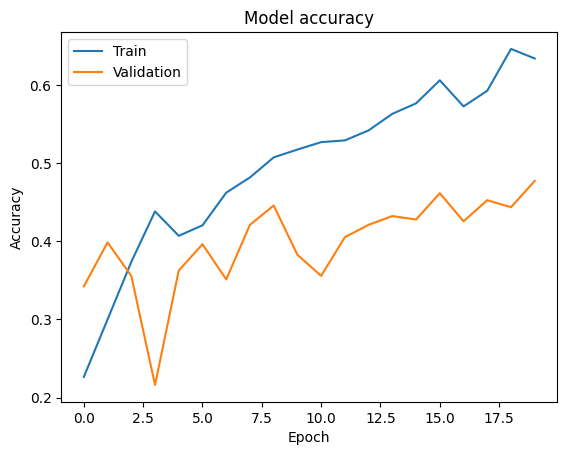

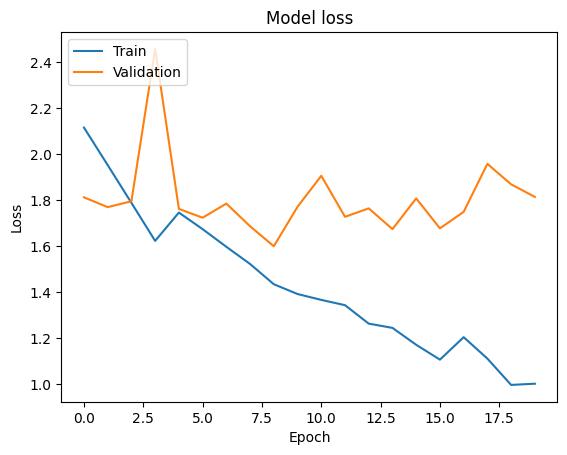

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 6. Data Augmentation
If the model shows signs of overfitting, we can apply data augmentation.

Found 1793 images belonging to 9 classes.
Found 444 images belonging to 9 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 48s 721ms/step - accuracy: 0.2111 - loss: 2.2400 - val_accuracy: 0.2725 - val_loss: 1.9239
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 664ms/step - accuracy: 0.3111 - loss: 1.8882 - val_accuracy: 0.3649 - val_loss: 1.8480
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 83s 699ms/step - accuracy: 0.3758 - loss: 1.7057 - val_accuracy: 0.3626 - val_loss: 1.8188
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 688ms/step - accuracy: 0.4279 - loss: 1.6511 - val_accuracy: 0.3536 - val_loss: 1.7182
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 687ms/step - accuracy: 0.4725 - loss: 1.5036 - val_accuracy: 0.4099 - val_loss: 1.8698
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 680ms/step - accuracy: 0.4570 - loss: 1.5329 - val_accuracy: 0.3694 - val_loss: 1.8915
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 661ms/step - accuracy: 0.4776 - loss: 1.5027 - val_accuracy: 0.4032 - val_loss: 1.8746
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 677ms/step - accuracy: 0.4981 - loss: 1.4835 - val_accuracy: 0.331

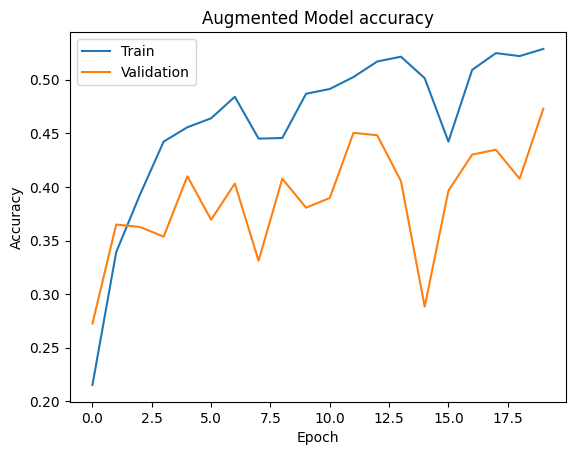

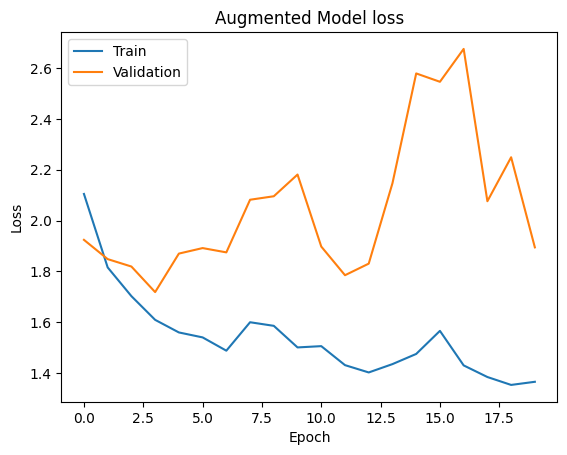

In [11]:
# Define the augmented data generator
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Create augmented training and validation generators
augmented_train_generator = augmented_datagen.flow_from_directory(
    data_directory,  # Corrected variable name
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

augmented_validation_generator = augmented_datagen.flow_from_directory(
    data_directory,  # Corrected variable name
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Train the model with augmented data
augmented_model = build_model()
augmented_history = augmented_model.fit(
    augmented_train_generator,
    epochs=EPOCHS,
    validation_data=augmented_validation_generator
)

# Analyze the performance of the augmented model
plt.plot(augmented_history.history['accuracy'])
plt.plot(augmented_history.history['val_accuracy'])
plt.title('Augmented Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(augmented_history.history['loss'])
plt.plot(augmented_history.history['val_loss'])
plt.title('Augmented Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 7. Handling Class Imbalances
To address class imbalances, we can use the Augmentor library to generate synthetic samples for underrepresented classes.

In [16]:
import Augmentor
import os
import matplotlib.pyplot as plt
import glob

# Ensure data_directory is correctly defined
print("Data Directory:", data_directory)

# Verify directory contents
print("\nContents of Data Directory:")
class_paths = [os.path.join(data_directory, class_name) for class_name in os.listdir(data_directory)]
for path in class_paths:
    print(f"Class: {os.path.basename(path)}")
    print(f"Number of original images: {len(os.listdir(path))}")

# Augmentation Process
for class_path in class_paths:
    print(f"\nProcessing class: {os.path.basename(class_path)}")

    # Create Augmentor Pipeline
    p = Augmentor.Pipeline(class_path)

    # Add augmentation operations
    p.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.5)
    p.random_brightness(probability=0.5, min_factor=0.5, max_factor=1.5)
    p.random_color(probability=0.5, min_factor=0.5, max_factor=1.5)

    # Generate samples
    p.sample(100)  # Generate 100 samples for each class
    print(f"Generated 100 augmented images for {os.path.basename(class_path)}")

# Visualization Function
def visualize_augmented_images(data_directory):
    class_paths = [os.path.join(data_directory, class_name) for class_name in os.listdir(data_directory)]

    for class_path in class_paths:
        # Find augmented images
        augmented_images = glob.glob(os.path.join(class_path, 'output', '*_augmented_*.jpg'))

        print(f"\nClass: {os.path.basename(class_path)}")
        print(f"Number of augmented images found: {len(augmented_images)}")

        # Visualize first 5 augmented images
        plt.figure(figsize=(15, 5))

        for i, img_path in enumerate(augmented_images[:5]):
            try:
                img = plt.imread(img_path)
                plt.subplot(1, 5, i + 1)
                plt.imshow(img)
                plt.title(f'Augmented {i+1}')
                plt.axis('off')
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

        plt.suptitle(f'Augmented Images from {os.path.basename(class_path)}')
        plt.tight_layout()
        plt.show()

# Call visualization function
visualize_augmented_images(data_directory)

Data Directory: /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train

Contents of Data Directory:
Class: actinic keratosis
Number of original images: 115
Class: basal cell carcinoma
Number of original images: 376
Class: dermatofibroma
Number of original images: 96
Class: melanoma
Number of original images: 439
Class: nevus
Number of original images: 358
Class: pigmented benign keratosis
Number of original images: 463
Class: seborrheic keratosis
Number of original images: 78
Class: squamous cell carcinoma
Number of original images: 182
Class: vascular lesion
Number of original images: 139

Processing class: actinic keratosis
Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78E06E25E710>: 100%|██████████| 100/100 [00:03<00:00, 32.70 Samples/s]


Generated 100 augmented images for actinic keratosis

Processing class: basal cell carcinoma
Initialised with 375 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78E06E252230>: 100%|██████████| 100/100 [00:02<00:00, 43.63 Samples/s]


Generated 100 augmented images for basal cell carcinoma

Processing class: dermatofibroma
Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78E05075DF30>: 100%|██████████| 100/100 [00:02<00:00, 42.19 Samples/s]


Generated 100 augmented images for dermatofibroma

Processing class: melanoma
Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78E05041DAB0>: 100%|██████████| 100/100 [00:09<00:00, 10.79 Samples/s]


Generated 100 augmented images for melanoma

Processing class: nevus
Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x78E06D6680D0>: 100%|██████████| 100/100 [00:06<00:00, 14.89 Samples/s]


Generated 100 augmented images for nevus

Processing class: pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78E06D5C9FF0>: 100%|██████████| 100/100 [00:02<00:00, 40.73 Samples/s]


Generated 100 augmented images for pigmented benign keratosis

Processing class: seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78E06D5B3A60>: 100%|██████████| 100/100 [00:03<00:00, 25.38 Samples/s]


Generated 100 augmented images for seborrheic keratosis

Processing class: squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78E06E2686A0>: 100%|██████████| 100/100 [00:03<00:00, 28.64 Samples/s]


Generated 100 augmented images for squamous cell carcinoma

Processing class: vascular lesion
Initialised with 138 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78E06D5CAE60>: 100%|██████████| 100/100 [00:02<00:00, 39.82 Samples/s]

Generated 100 augmented images for vascular lesion

Class: actinic keratosis
Number of augmented images found: 0


<Figure size 1500x500 with 0 Axes>


Class: basal cell carcinoma
Number of augmented images found: 0


<Figure size 1500x500 with 0 Axes>


Class: dermatofibroma
Number of augmented images found: 0


<Figure size 1500x500 with 0 Axes>


Class: melanoma
Number of augmented images found: 0


<Figure size 1500x500 with 0 Axes>


Class: nevus
Number of augmented images found: 0


<Figure size 1500x500 with 0 Axes>


Class: pigmented benign keratosis
Number of augmented images found: 0


<Figure size 1500x500 with 0 Axes>


Class: seborrheic keratosis
Number of augmented images found: 0


<Figure size 1500x500 with 0 Axes>


Class: squamous cell carcinoma
Number of augmented images found: 0


<Figure size 1500x500 with 0 Axes>


Class: vascular lesion
Number of augmented images found: 0


<Figure size 1500x500 with 0 Axes>

# 8. Final Model Training on Rectified Data
After augmenting the dataset to handle class imbalances, we will train the final model.

Found 4037 images belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 55s 389ms/step - accuracy: 0.1983 - loss: 2.1675 - val_accuracy: 0.4122 - val_loss: 1.8016
Epoch 2/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 75s 350ms/step - accuracy: 0.3300 - loss: 1.8074 - val_accuracy: 0.5000 - val_loss: 1.4978
Epoch 3/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 81s 344ms/step - accuracy: 0.4122 - loss: 1.6310 - val_accuracy: 0.5023 - val_loss: 1.4450
Epoch 4/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 87s 380ms/step - accuracy: 0.4482 - loss: 1.5312 - val_accuracy: 0.5653 - val_loss: 1.3955
Epoch 5/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 46s 347ms/step - accuracy: 0.4502 - loss: 1.4656 - val_accuracy: 0.5360 - val_loss: 1.2369
Epoch 6/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 51s 389ms/step - accuracy: 0.4888 - loss: 1.3744 - val_accuracy: 0.6149 - val_loss: 1.1145
Epoch 7/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 78s 350ms/step - accuracy: 0.5344 - loss: 1.2751 - val_accuracy: 0.6396 - val_loss: 1.1205
Epoch 8/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 85s 378ms/step - accuracy: 0.5359 - loss: 1

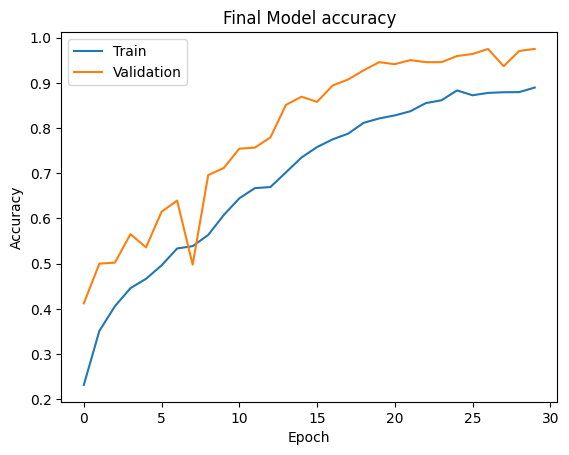

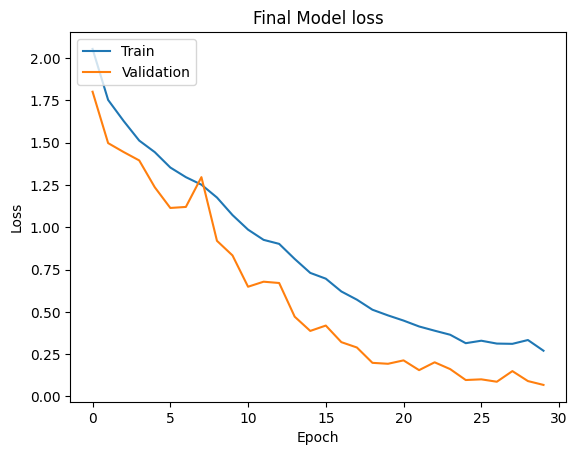

In [17]:
# Create a new data generator for the rectified dataset
rectified_datagen = ImageDataGenerator(rescale=1./255)

rectified_train_generator = rectified_datagen.flow_from_directory(
    data_directory,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Train the final model
final_model = build_model()
final_history = final_model.fit(
    rectified_train_generator,
    epochs=30,
    validation_data=validation_generator
)

# Analyze the final model's performance
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('Final Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title('Final Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 9. Class Distribution Analysis

Before finalizing the model, it's essential to analyze the class distribution in the training dataset to identify any imbalances.

In [18]:
import pandas as pd

# Get class distribution
class_counts = train_generator.classes
class_distribution = pd.Series(class_counts).value_counts()

# Display class distribution
print(class_distribution)

# Identify the class with the least number of samples
least_samples_class = class_distribution.idxmin()
least_samples_count = class_distribution.min()

# Identify the classes that dominate the data
dominant_classes = class_distribution[class_distribution > class_distribution.mean()]

print(f'Class with the least number of samples: {least_samples_class} ({least_samples_count} samples)')
print(f'Dominant classes:\n{dominant_classes}')

5    370
3    351
1    300
4    286
7    145
8    111
0     92
2     76
6     62
Name: count, dtype: int64
Class with the least number of samples: 6 (62 samples)
Dominant classes:
5    370
3    351
1    300
4    286
Name: count, dtype: int64


# 10. Handling Class Imbalances with Augmentor
To rectify class imbalances, we can use the Augmentor library to generate additional samples for the underrepresented classes.

In [21]:
print("Class Distribution Index:", class_distribution.index.tolist())

Class Distribution Index: [5, 3, 1, 4, 7, 8, 0, 2, 6]


In [22]:
import os

for root, dirs, files in os.walk(data_directory):
    print("Root:", root)
    print("Directories:", dirs)
    print("Files:", files)

Root: /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Directories: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Files: []
Root: /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis
Directories: ['output']
Files: ['ISIC_0025780.jpg', 'ISIC_0025803.jpg', 'ISIC_0025825.jpg', 'ISIC_0025957.jpg', 'ISIC_0025992.jpg', 'ISIC_0025953.jpg', 'ISIC_0026040.jpg', 'ISIC_0026171.jpg', 'ISIC_0026149.jpg', 'ISIC_0026457.jpg', 'ISIC_0026194.jpg', 'ISIC_0026212.jpg', 'ISIC_0026625.jpg', 'ISIC_0026575.jpg', 'ISIC_0026468.jpg', 'ISIC_0026525.jpg', 'ISIC_0026626.jpg', 'ISIC_0026650.jpg', 'ISIC_0026702.jpg', 'ISIC_0026848.jpg', 'ISIC_0026729.jpg', 'ISIC_0026709.jpg', 'ISIC_0026765.jpg', 'ISIC_0026857.jpg', 'ISIC_0026905.jpg', 'ISIC_0026984.jpg', 'ISIC_

In [24]:
import os
import Augmentor
import pandas as pd

# Define the data directory
data_directory = '/content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

# Define the actual class names based on the directory structure
class_names = [
    'actinic keratosis',
    'basal cell carcinoma',
    'dermatofibroma',
    'melanoma',
    'nevus',
    'pigmented benign keratosis',
    'seborrheic keratosis',
    'squamous cell carcinoma',
    'vascular lesion'
]

# Create a mapping from indices to class names
class_distribution = {i: class_name for i, class_name in enumerate(class_names)}

# Create a dictionary to store the number of images per class
image_counts = {}

# Count images in each class directory
for class_name in class_names:
    class_path = os.path.join(data_directory, class_name)
    if os.path.exists(class_path):
        image_counts[class_name] = len(os.listdir(class_path))
    else:
        print(f"Warning: The class path {class_path} does not exist.")

# Convert image_counts to a pandas Series for easier manipulation
image_counts_series = pd.Series(image_counts)

# Create an Augmentor pipeline for each class
for index in class_distribution.keys():
    class_name = class_distribution[index]
    class_path = os.path.join(data_directory, class_name)

    # Check if the class_path exists
    if not os.path.exists(class_path):
        print(f"Warning: The class path {class_path} does not exist. Skipping this class.")
        continue

    p = Augmentor.Pipeline(class_path)
    p.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.5)
    p.random_brightness(probability=0.5, min_factor=0.5, max_factor=1.5)
    p.random_color(probability=0.5, min_factor=0.5, max_factor=1.5)

    # Sample additional images to balance the dataset
    samples_needed = (image_counts_series.max() - image_counts_series[class_name]) // 2
    if samples_needed > 0:  # Only sample if needed
        p.sample(samples_needed)
    else:
        print(f"No additional samples needed for class {class_name}.")

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78E06E26A2F0>: 100%|██████████| 174/174 [00:05<00:00, 29.42 Samples/s]


Initialised with 375 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78E0642053C0>: 100%|██████████| 43/43 [00:00<00:00, 46.82 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78E06D527E20>: 100%|██████████| 183/183 [00:04<00:00, 37.42 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2313x1985 at 0x78E01E516D70>: 100%|██████████| 12/12 [00:00<00:00, 12.49 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78E003D28C40>: 100%|██████████| 52/52 [00:03<00:00, 13.90 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.No additional samples needed for class pigmented benign keratosis.
Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78E0F9168040>: 100%|██████████| 192/192 [00:08<00:00, 21.48 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78E003D081F0>: 100%|██████████| 140/140 [00:03<00:00, 42.60 Samples/s]


Initialised with 138 image(s) found.
Output directory set to /content/drive/MyDrive/CnnUpgrade/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78E003DDCDC0>: 100%|██████████| 162/162 [00:04<00:00, 32.56 Samples/s]


# 11. Final Model Training on Rectified Class Imbalance Data
After augmenting the dataset to handle class imbalances, we will train the final model again.

Found 4995 images belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 62s 352ms/step - accuracy: 0.1546 - loss: 2.3027 - val_accuracy: 0.3514 - val_loss: 1.7546
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 346ms/step - accuracy: 0.3174 - loss: 1.7510 - val_accuracy: 0.5113 - val_loss: 1.4687
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 317ms/step - accuracy: 0.3810 - loss: 1.6553 - val_accuracy: 0.5383 - val_loss: 1.4385
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 317ms/step - accuracy: 0.4361 - loss: 1.4948 - val_accuracy: 0.5068 - val_loss: 1.3871
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 322ms/step - accuracy: 0.4429 - loss: 1.4517 - val_accuracy: 0.6351 - val_loss: 1.1728
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 343ms/step - accuracy: 0.4625 - loss: 1.4224 - val_accuracy: 0.5923 - val_loss: 1.1270
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 321ms/step - accuracy: 0.4827 - loss: 1.3518 - val_accuracy: 0.6532 - val_loss: 1.0940
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 318ms/step - accuracy: 0.5019 - loss: 1.3183 - val

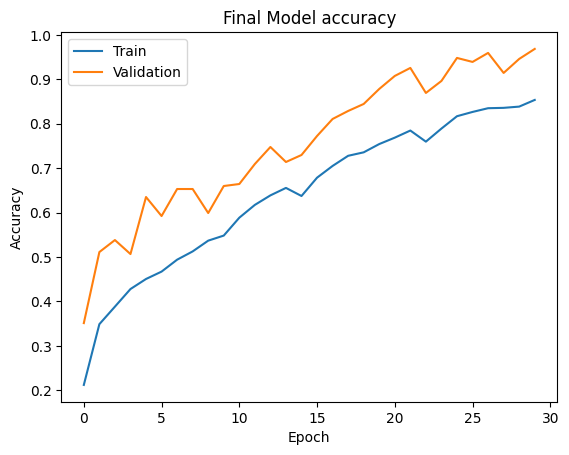

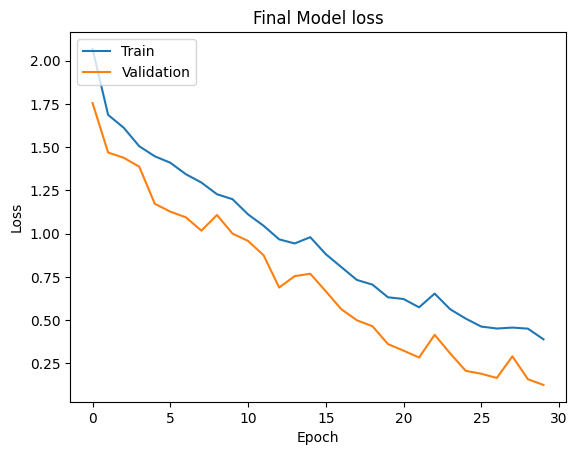

In [25]:
# Create a new data generator for the rectified dataset
rectified_datagen = ImageDataGenerator(rescale=1./255)

rectified_train_generator = rectified_datagen.flow_from_directory(
    data_directory,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Train the final model
final_model = build_model()
final_history = final_model.fit(
    rectified_train_generator,
    epochs=30,
    validation_data=validation_generator
)

# Analyze the final model's performance
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('Final Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title('Final Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 12. Conclusion and Findings




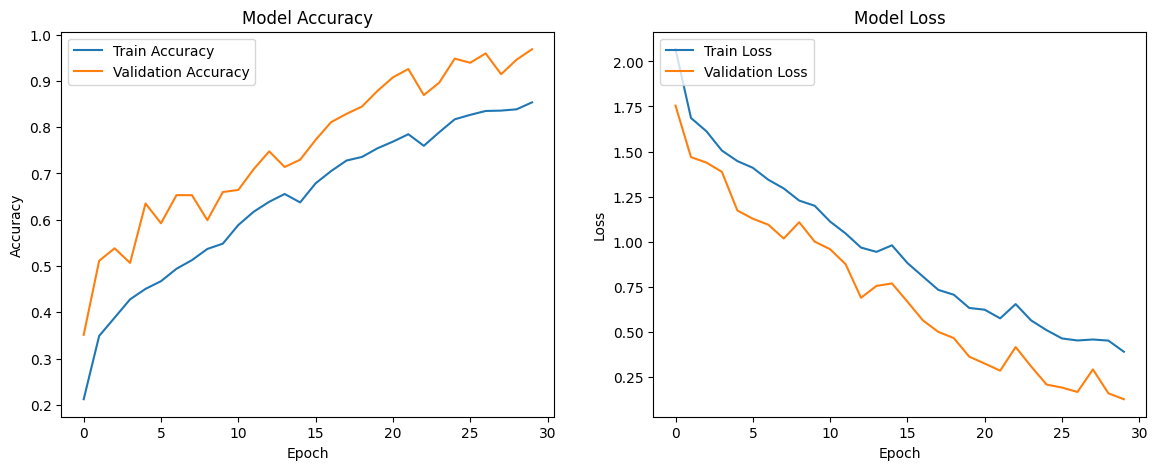

Final Training Accuracy: 85.37%
Final Validation Accuracy: 96.85%
Final Training Loss: 0.3889
Final Validation Loss: 0.1252
The model shows good performance with validation accuracy over 85% and loss under 0.2.


In [26]:
import matplotlib.pyplot as plt

def analyze_model_performance(history):
    """
    Analyze the model's performance based on training and validation accuracy and loss.

    Parameters:
    - history: The history object returned by the model's fit method.
    """
    # Plot accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

    # Evaluate improvements
    final_train_accuracy = history.history['accuracy'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print("Final Training Accuracy: {:.2f}%".format(final_train_accuracy * 100))
    print("Final Validation Accuracy: {:.2f}%".format(final_val_accuracy * 100))
    print("Final Training Loss: {:.4f}".format(final_train_loss))
    print("Final Validation Loss: {:.4f}".format(final_val_loss))

    # Check for improvements
    if final_val_accuracy > 0.85 and final_val_loss < 0.2:
        print("The model shows good performance with validation accuracy over 85% and loss under 0.2.")
    else:
        print("The model may require further tuning or adjustments.")

# Call the analysis function with the final model's training history
analyze_model_performance(final_history)